# Random Variables and Distributions

---

## Random Variables

A **random variable** is a real-valued function defined on a probability space $(\Omega, \mathcal{F}, P)$. Formally, a function $X: \Omega \to \mathbb{R}$ is a random variable if, for every Borel subset $B \subseteq \mathbb{R}$, the set:
$$
\{X \in B\} = \{\omega \in \Omega \mid X(\omega) \in B\}
$$
is in the $\sigma$-algebra $\mathcal{F}$.

This ensures that probabilities can be assigned to events related to $X$ using the probability measure $P$.

### Borel Subsets
The Borel subsets of $\mathbb{R}$, denoted $\mathcal{B}(\mathbb{R})$, are the smallest $\sigma$-algebra containing all open intervals $(a, b) \subseteq \mathbb{R}$. Key properties include:
1. Any **closed interval** (e.g., $[a, b]$) is a Borel set.
2. Any **open interval** (e.g., $(a, b)$) is a Borel set, as it can be expressed as a countable union of closed intervals.
3. Any **open set** is a Borel set, as it is a union of open intervals.
4. Any **closed set** is a Borel set, as it is the complement of an open set.

For S&P 500 returns:
- Let $\Omega = [0, 1]$ represent normalized daily returns.
- A random variable $X$ could represent the return observed for a given day, where $X(\omega) \in \mathbb{R}$ maps outcomes $\omega$ to real numbers (e.g., $X(\omega) = 0.01$ for a 1% return).

#### Example: Stock Prices and Random Variables
Consider the independent, infinite coin toss space $(\Omega, \mathcal{F}, P)$. Define a sequence of stock prices $S_n(\omega)$ as random variables, where:
- $S_0(\omega) = 4$ for all $\omega$,
- $S_1(\omega) = \begin{cases} 
8 & \text{if } \omega_1 = H, \\ 
2 & \text{if } \omega_1 = T,
\end{cases}$
- $S_2(\omega) = \begin{cases} 
16 & \text{if } \omega_1 = H \text{ and } \omega_2 = H, \\ 
4 & \text{if } \omega_1 \neq \omega_2, \\ 
1 & \text{if } \omega_1 = T \text{ and } \omega_2 = T.
\end{cases}$

Each $S_n(\omega)$ assigns a numerical value to every possible sequence of coin tosses. For instance:
- If $\omega = HHT$, then $S_2(\omega) = 4$.

These random variables have distributions. For $S_2$, the probabilities of different values are:
- $P(S_2 = 16) = p^2$,
- $P(S_2 = 4) = 2pq$,
- $P(S_2 = 1) = q^2$.

---

## Distributions and Probability Measures

The **distribution** of a random variable describes how probability is assigned to different values or ranges of values. Formally, the distribution measure $\mu_X$ of a random variable $X$ is the probability measure on $\mathbb{R}$ such that:
$$
\mu_X(B) = P(\{X \in B\}),
$$
for every Borel subset $B \subseteq \mathbb{R}$.

For example, in the coin toss space:
- $\mu_{S_2}(\{4\}) = P(S_2 = 4) = 2pq$,
- $\mu_{S_2}([2, 5]) = P(S_2 \in [2, 5]) = 2pq$.

For normalized S&P 500 returns:
- Let $X(\omega)$ represent the return for a given day. The probability of returns falling in a range (e.g., $[0.01, 0.02]$) is:
  $$
  P(X \in [0.01, 0.02]) = \mu_X([0.01, 0.02]).
  $$

---

## Cumulative Distribution Function (CDF)

The **cumulative distribution function** (CDF) $F(x)$ of a random variable $X$ is defined as:
$$
F(x) = P(X \leq x).
$$
The CDF provides the probability that $X$ takes a value less than or equal to $x$. For example:
- If $X$ represents normalized S&P 500 returns and $F(0.01) = 0.3$, this means there is a $30\%$ chance that the return is less than or equal to $1\%$.

The CDF and the distribution measure are related:
$$
\mu_X((a, b]) = F(b) - F(a).
$$

---

## Probability Density and Mass Functions

### Probability Density Function (PDF)
For random variables with continuous distributions, the PDF $f(x)$ satisfies:
$$
P(a \leq X \leq b) = \int_a^b f(x) \, dx,
$$
where:
1. $f(x) \geq 0$,
2. $\int_{-\infty}^\infty f(x) \, dx = 1$.

#### Key Characteristics:
- Represents a continuous probability density.
- The **area under the curve** (not the height of the curve) over a range equals the probability of the variable falling within that range.
- The total area under the entire curve equals 1:
  $$
  \int_{-\infty}^\infty f(x) \, dx = 1
  $$

Example: If $X$ represents normalized S&P 500 returns and $f(x)$ is uniform over $[0, 1]$:
$$
f(x) = 1 \quad \text{for } x \in [0, 1].
$$
The probability of returns in $[0.01, 0.02]$ is:
$$
P(X \in [0.01, 0.02]) = \int_{0.01}^{0.02} 1 \, dx = 0.01.
$$

### Probability Mass Function (PMF)
For discrete random variables, the PMF assigns probabilities to individual outcomes:
$$
P(X = x_i) = p_i, \quad \text{where } \sum_i p_i = 1.
$$

#### Key Characteristics:
- Represents discrete probabilities (or binned data).
- The total sum of all probabilities (heights of bars) equals 1:
  $$
  \sum_{i=1}^n P(X = x_i) = 1
  $$

For $S_2$ in the coin toss space:
- $P(S_2 = 16) = p^2$,
- $P(S_2 = 4) = 2pq$,
- $P(S_2 = 1) = q^2$.

---

## Key Insights
- Random variables map outcomes to real numbers, enabling us to study quantitative phenomena like S&P 500 returns.
- The distribution of a random variable provides the probabilities of values or ranges, essential for modeling and analysis.
- Continuous random variables (e.g., returns) use PDFs, while discrete ones (e.g., coin toss outcomes) use PMFs.


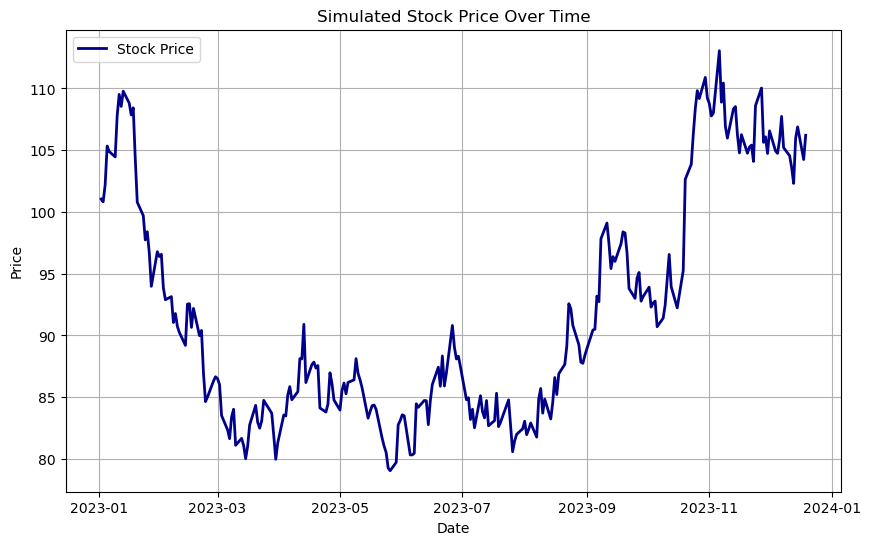

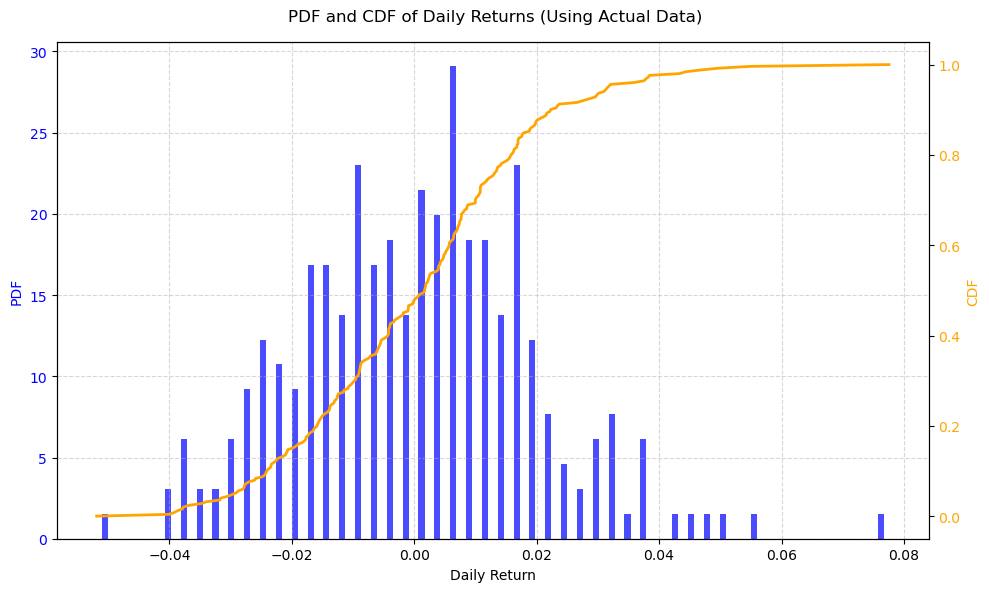

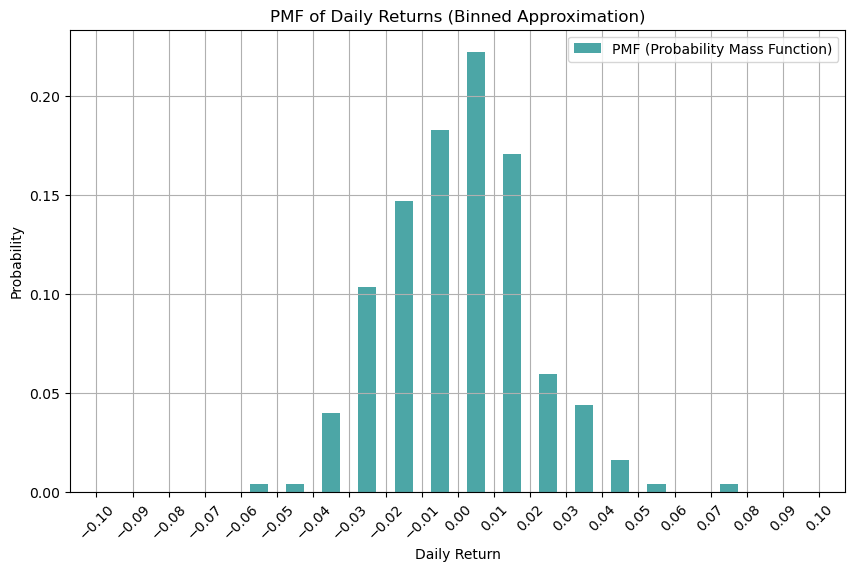

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

# Generate random daily returns for a hypothetical stock
np.random.seed(42)  # For reproducibility
n_days = 252  # One year of trading days
mean_return = 0.0005  # Average daily return (e.g., 0.05%)
volatility = 0.02  # Daily volatility (2%)

# Random returns (assuming normal distribution)
daily_returns = np.random.normal(mean_return, volatility, n_days)

# Generate stock prices starting at $100
initial_price = 100
stock_prices = initial_price * np.cumprod(1 + daily_returns)

# Create a DataFrame for analysis
dates = pd.date_range(start="2023-01-01", periods=n_days, freq="B")
data = pd.DataFrame({"Date": dates, "Daily_Return": daily_returns, "Price": stock_prices})

# Define PDF, CDF, and PMF (based on theoretical normal distribution)
x = np.linspace(-0.1, 0.1, 1000)  # Range for returns
pdf = norm.pdf(x, loc=mean_return, scale=volatility)  # Probability Density Function
cdf = norm.cdf(x, loc=mean_return, scale=volatility)  # Cumulative Distribution Function

# Discrete PMF approximation using bins for daily returns
bins = np.linspace(-0.1, 0.1, 21)  # Define bins for discretization
hist, bin_edges = np.histogram(daily_returns, bins=bins, density=True)  # Histogram for PMF
pmf = hist * np.diff(bin_edges)  # Approximation of probability for each bin

# Corrected PDF and CDF using actual daily returns
pdf_hist, pdf_bins = np.histogram(daily_returns, bins=50, density=True)  # PDF from actual data
pdf_bin_centers = (pdf_bins[:-1] + pdf_bins[1:]) / 2
sorted_returns = np.sort(daily_returns)  # Sorted returns for CDF
cdf_values = np.linspace(0, 1, len(sorted_returns))

# Plot 1: Stock prices over time
plt.figure(figsize=(10, 6))
plt.plot(data["Date"], data["Price"], label="Stock Price", color="darkblue", linewidth=2)
plt.title("Simulated Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

# Plot 2: PDF and CDF with secondary axis (Using Actual Daily Returns)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PDF
ax1.bar(pdf_bin_centers, pdf_hist, width=0.001, color="blue", alpha=0.7, label="PDF (Actual)")
ax1.set_xlabel("Daily Return")
ax1.set_ylabel("PDF", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.grid(alpha=0.5, linestyle="--")

# Secondary axis for CDF
ax2 = ax1.twinx()
ax2.plot(sorted_returns, cdf_values, color="orange", label="CDF (Actual)", linewidth=2)
ax2.set_ylabel("CDF", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Title and Legend
fig.suptitle("PDF and CDF of Daily Returns (Using Actual Data)")
fig.tight_layout()
plt.show()

# Plot 3: PMF of daily returns
plt.figure(figsize=(10, 6))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
plt.bar(bin_centers, pmf, width=0.005, alpha=0.7, label="PMF (Probability Mass Function)", color="teal")
plt.xticks(bin_edges, rotation=45)  # Rotate x-ticks for better readability
plt.title("PMF of Daily Returns (Binned Approximation)")
plt.xlabel("Daily Return")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()


### Explanation of the Plots: Random Variables, Distributions, and Probability Measures

---

#### 1. Simulated Stock Price Over Time

**What it Represents**:
- The graph shows the simulated stock price over a year (252 trading days) based on random daily returns.
- The stock price at time $t+1$ is calculated as:
  $$
  P_{t+1} = P_t \cdot (1 + r_t),
  $$
  where $P_t$ is the price at time $t$, and $r_t$ is the randomly generated daily return.

**Relation to Random Variables and Distributions**:
- **Random Variable**: Each daily return $r_t$ is a random variable determined by a probabilistic process (e.g., stock market fluctuations). The stock price $P_t$ is also a random variable derived from these returns.
- **Borel Sigma Algebra**: The subsets of possible prices or returns form events in the Borel sigma algebra $\mathcal{B}(\mathbb{R})$, allowing computation of probabilities for events like "$P_t > 110$" or "$r_t < -0.02$."
- **Distributions**: The distribution of daily returns determines the variability in stock prices. The graph reflects the mean return (0.05%) and volatility (2%) derived from a normal distribution.

**Key Insights**:
- This plot highlights how randomness in returns generates variability in stock prices.
- Probabilities assigned to specific events depend on the distribution of the random variable representing daily returns.

---

#### 2. PDF and CDF of Daily Returns

**What it Represents**:
- **PDF (Probability Density Function)**: The blue curve shows the density of daily returns. The height of the curve at a point $r$ indicates the relative likelihood of returns near $r$.
- **CDF (Cumulative Distribution Function)**: The orange curve represents the cumulative probability that a return is less than or equal to a given value $r$:
  $$
  F(r) = P(R \leq r).
  $$

**Relation to Random Variables and Distributions**:
- **Random Variable**: The daily return $R$ is a continuous random variable. The PDF and CDF provide different views of its distribution.
- **Borel Sigma Algebra**: The PDF assigns densities to subsets of $\mathbb{R}$, while the CDF accumulates probabilities over intervals. Both rely on events from the Borel sigma algebra $\mathcal{B}(\mathbb{R})$.
- **Distributions**: The PDF shows where returns are most likely, while the CDF provides cumulative probabilities, such as "$P(-0.02 \leq R \leq 0.01)$."

**Key Insights**:
- The CDF is useful for computing probabilities over ranges of returns.
- The PDF and CDF are central for analyzing continuous random variables like stock returns.

---

#### 3. PMF of Daily Returns (Binned Approximation)

**What it Represents**:
- The PMF (Probability Mass Function) approximates the probability of observing daily returns within specific ranges (bins). For example, the bin $[-0.01, -0.005]$ corresponds to returns between $-1\%$ and $-0.5\%$, and its height reflects the probability of observing such returns.

**Relation to Random Variables and Distributions**:
- **Random Variable**: Unlike the PDF, the PMF applies to a discretized version of the continuous random variable $R$. It groups continuous values into bins.
- **Borel Sigma Algebra**: The bins correspond to subsets of $\mathbb{R}$ in the Borel sigma algebra. Probabilities are assigned to these subsets using the histogram.
- **Distributions**: The PMF approximates the probability distribution by summing probabilities over discrete bins, effectively converting the continuous distribution into a discrete one.

**Key Insights**:
- The PMF is useful for visualizing probabilities in a discretized format.
- While the PDF shows continuous densities, the PMF gives probabilities for specific ranges, making it more interpretable for practical applications.
